#**ĐỒ ÁN CUỐI KÌ MÔN MÁY HỌC CS114.M11**
#NHẬN DIỆN BIỂN BÁO GIAO THÔNG CHO NGƯỜI ĐIỀU KHIỂN XE MÁY KHU VỰC THÀNH PHỐ HỒ CHÍ MINH

## Giảng viên: 

*   Lê Đình Duy
*   Phạm Nguyễn Trường An

## Nhóm LHH
## Các thành viên thực hiện đồ án: 


*   Nguyễn Minh Lý (20521592)
*   Nguyễn Đặng Nhật Hào (20520490)
*   Nguyễn Hồng Hậu (20521300)






In [1]:
!nvidia-smi

Tue Feb  8 15:09:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Git clone source code và install environment

In [3]:
%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5 

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 10892, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10892 (delta 1), reused 4 (delta 0), pack-reused 10885
Receiving objects: 100% (10892/10892), 10.99 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (7522/7522), done.


In [4]:
%cd /content/drive/MyDrive/yolov5
!pip install -r requirements.txt 

/content/drive/MyDrive/yolov5
     |████████████████████████████████| 596 kB 5.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Prepare data


In [5]:
%cd /content/drive/MyDrive/yolov5/data
!gdown --id 1R6CETUara5VzBFEB8WUc2AIafvwOzWx9

/content/drive/MyDrive/yolov5/data
Downloading...
From: https://drive.google.com/uc?id=1R6CETUara5VzBFEB8WUc2AIafvwOzWx9
To: /content/drive/MyDrive/yolov5/data/data.zip
100% 390M/390M [00:03<00:00, 110MB/s]


In [6]:
!unzip data.zip

Archive:  data.zip
   creating: data/images/
   creating: data/images/train/
  inflating: data/images/train/image (10).jpg  
  inflating: data/images/train/image (100).jpg  
  inflating: data/images/train/image (1001).jpg  
  inflating: data/images/train/image (1002).jpg  
  inflating: data/images/train/image (1003).jpg  
  inflating: data/images/train/image (1005).jpg  
  inflating: data/images/train/image (1006).jpg  
  inflating: data/images/train/image (1007).jpg  
  inflating: data/images/train/image (1008).jpg  
  inflating: data/images/train/image (101).jpg  
  inflating: data/images/train/image (1010).jpg  
  inflating: data/images/train/image (1011).jpg  
  inflating: data/images/train/image (1012).jpg  
  inflating: data/images/train/image (1013).jpg  
  inflating: data/images/train/image (1014).jpg  
  inflating: data/images/train/image (1015).jpg  
  inflating: data/images/train/image (1018).jpg  
  inflating: data/images/train/image (1019).jpg  
  inflating: data/images/tr

Kiểm tra lại sau khi giải nén thì folder images/ và labels/ phải nằm trong yolov5/data như sau

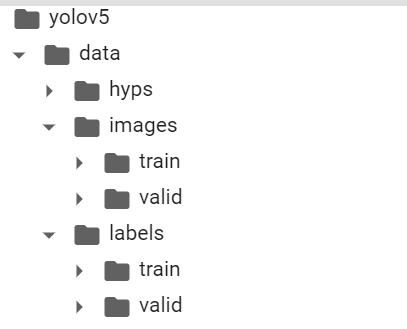

In [10]:
# Thay file config bằng file chúng em đã cấu hình sẵn
%cd /content/drive/MyDrive/yolov5/data
!rm /content/drive/MyDrive/yolov5/data/coco128.yaml
!gdown --id 1n2nSkbOSqN1QlDgf_lWu3YlFrfGwQqwp

/content/drive/MyDrive/yolov5/data
Downloading...
From: https://drive.google.com/uc?id=1n2nSkbOSqN1QlDgf_lWu3YlFrfGwQqwp
To: /content/drive/MyDrive/yolov5/data/coco128.yaml
100% 1.93k/1.93k [00:00<00:00, 3.36MB/s]


## Train

In [11]:
!python /content/drive/MyDrive/yolov5/train.py \
        --img 416 \
        --batch 16 \
        --epochs 300 \
        --data coco128.yaml \
        --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=../data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

## Detect

Tải file weight chúng em đã train sẵn về để predict

In [12]:
%cd /content/drive/MyDrive/yolov5
!gdown --id 1pux_7RPKlZiqQhRILtU0e6GVxS_7iw_R #Train trên data gốc
!gdown --id 1GA1_rTUwECP5o1-T5fuuLRBcL6mYASQl #Train trên data tăng cường

/content/drive/MyDrive/yolov5
Downloading...
From: https://drive.google.com/uc?id=1pux_7RPKlZiqQhRILtU0e6GVxS_7iw_R
To: /content/drive/MyDrive/yolov5/best_v5_sourcedata.pt
100% 14.6M/14.6M [00:00<00:00, 38.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GA1_rTUwECP5o1-T5fuuLRBcL6mYASQl
To: /content/drive/MyDrive/yolov5/best_v5_augmentdata.pt
100% 57.7M/57.7M [00:00<00:00, 123MB/s]


### Detect on images

In [13]:
%cd /content/drive/MyDrive/yolov5/data
!gdown --id 1aaLT52kF9KzKEw2_ixWsXxYZ3ylu7PiM #Download image để test

/content/drive/MyDrive/yolov5/data
Downloading...
From: https://drive.google.com/uc?id=1aaLT52kF9KzKEw2_ixWsXxYZ3ylu7PiM
To: /content/drive/MyDrive/yolov5/data/603.jpg
100% 163k/163k [00:00<00:00, 51.2MB/s]


In [14]:
# detect 1 ảnh
%cd /content/drive/MyDrive/yolov5
!python detect.py \
        --data data/coco128.yaml\
        --source data/603.jpg \
        --weights best_v5_augmentdata.pt \
        --conf 0.5 \
        --save-txt \
        --save-conf

/content/drive/MyDrive/yolov5
detect: weights=['best_v5_augmentdata.pt'], source=data/603.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7144975 parameters, 0 gradients, 16.2 GFLOPs
image 1/1 /content/drive/MyDrive/yolov5/data/603.jpg: 640x384 1 di_thang, 1 cam_oto, Done. (0.029s)
Speed: 0.5ms pre-process, 29.0ms inference, 5.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


In [15]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

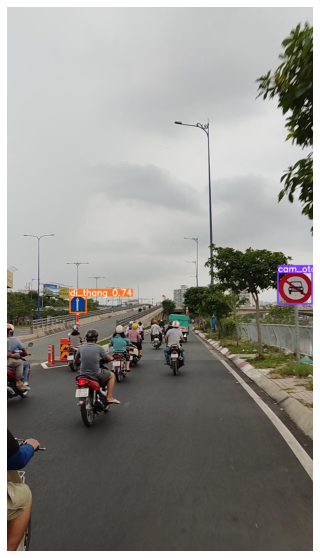

In [16]:
imShow('/content/drive/MyDrive/yolov5/runs/detect/exp/603.jpg')

### Detect on video


In [19]:
%cd /content/drive/MyDrive/yolov5/data
!gdown --id 1aFRaFyxqydKjgyBH3ko_Yrp1G4GqJ2nF #Download video để test

/content/drive/MyDrive/yolov5/data
Downloading...
From: https://drive.google.com/uc?id=1aFRaFyxqydKjgyBH3ko_Yrp1G4GqJ2nF
To: /content/drive/MyDrive/yolov5/data/1.mp4
100% 310M/310M [00:02<00:00, 143MB/s]


In [20]:
%cd /content/drive/MyDrive/yolov5
!python detect.py \
        --source /content/drive/MyDrive/yolov5/data/1.mp4 \
        --data data/coco128.yaml \
        --weight best_v5_augmentdata.pt \
        --conf 0.4 \
        --save-conf

/content/drive/MyDrive/yolov5
detect: weights=['best_v5_augmentdata.pt'], source=/content/drive/MyDrive/yolov5/data/1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7144975 parameters, 0 gradients, 16.2 GFLOPs
video 1/1 (1/3217) /content/drive/MyDrive/yolov5/data/1.mp4: 640x384 Done. (0.029s)
video 1/1 (2/3217) /content/drive/MyDrive/yolov5/data/1.mp4: 640x384 Done. (0.029s)
video 1/1 (3/3217) /content/drive/MyDrive/yolov5/data/1.mp4: 640x384 Done. (0.029s)
video 1/1 (4/3217) /content/drive/MyDrive/yolov5/data/1.mp4: 640x384 Done. (0.02

## Evaluate

### Đánh giá file weight train trên tập gốc

In [21]:
!python val.py --weights best_v5_sourcedata.pt --verbose

val: data=data/coco128.yaml, weights=['best_v5_sourcedata.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7144975 parameters, 0 gradients, 16.2 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/data/data/labels/valid.cache' images and labels... 269 found, 0 missing, 0 empty, 0 corrupt: 100% 269/269 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 9/9 [00:16<00:00,  1.83s/it]
                 all        269        411      0.895      0.987      0.987      0.882
         cam_re_trai        269          8      0.937          1      0.995       0.91
     cam_su_dung_coi        269    

In [22]:
!python val.py --weights best_v5_sourcedata.pt

val: data=data/coco128.yaml, weights=['best_v5_sourcedata.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7144975 parameters, 0 gradients, 16.2 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/data/data/labels/valid.cache' images and labels... 269 found, 0 missing, 0 empty, 0 corrupt: 100% 269/269 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 9/9 [00:14<00:00,  1.60s/it]
                 all        269        411      0.895      0.987      0.987      0.882
Speed: 0.2ms pre-process, 11.7ms inference, 4.7ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp2

### Đánh giá file weight train trên tập tăng cường

In [23]:
!python val.py --weights best_v5_augmentdata.pt --verbose

val: data=data/coco128.yaml, weights=['best_v5_augmentdata.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7144975 parameters, 0 gradients, 16.2 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/data/data/labels/valid.cache' images and labels... 269 found, 0 missing, 0 empty, 0 corrupt: 100% 269/269 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 9/9 [00:14<00:00,  1.61s/it]
                 all        269        411      0.964      0.975      0.985      0.862
         cam_re_trai        269          8       0.99          1      0.995      0.884
     cam_su_dung_coi        269   

In [24]:
!python val.py --weights best_v5_augmentdata.pt

val: data=data/coco128.yaml, weights=['best_v5_augmentdata.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7144975 parameters, 0 gradients, 16.2 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/data/data/labels/valid.cache' images and labels... 269 found, 0 missing, 0 empty, 0 corrupt: 100% 269/269 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 9/9 [00:14<00:00,  1.65s/it]
                 all        269        411      0.964      0.975      0.985      0.862
Speed: 0.2ms pre-process, 12.7ms inference, 5.2ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp